In [ ]:
import pandas as pd


# Creamos un Dataset

In [207]:
df = pd.DataFrame(data={"Pais":['Mexico', 'Argentina', 'Espana', 'Colombia'],
                        "Poblacion":[127212000, 45167000, 47099000, 48922000]})

In [208]:
df


,Pais,Poblacion
0,Mexico,127212000
1,Argentina,45167000
2,Espana,47099000
3,Colombia,48922000


## Ordenamos por columna

In [209]:
df.sort_values(["Poblacion"], ascending=False)


,Pais,Poblacion
0,Mexico,127212000
3,Colombia,48922000
2,Espana,47099000
1,Argentina,45167000


In [210]:
df = df.sort_values(["Pais"])
df


,Pais,Poblacion
1,Argentina,45167000
3,Colombia,48922000
2,Espana,47099000
0,Mexico,127212000


## Agregar una columna

In [211]:
df["Superficie"] = [1964375, 2780400, 505944, 1142748]
df


,Pais,Poblacion,Superficie
1,Argentina,45167000,1964375
3,Colombia,48922000,2780400
2,Espana,47099000,505944
0,Mexico,127212000,1142748


### Asigno mismo valor a todas las filas en una columna nueva

In [212]:
df['Deporte'] = 'Futbol'
df


,Pais,Poblacion,Superficie,Deporte
1,Argentina,45167000,1964375,Futbol
3,Colombia,48922000,2780400,Futbol
2,Espana,47099000,505944,Futbol
0,Mexico,127212000,1142748,Futbol


## Eliminar una columna

In [213]:
df = df.drop(['Deporte'], axis=1)
df


,Pais,Poblacion,Superficie
1,Argentina,45167000,1964375
3,Colombia,48922000,2780400
2,Espana,47099000,505944
0,Mexico,127212000,1142748


## Eliminar multiples columnas

In [214]:
df.drop(['Superficie', 'Pais'], axis=1)


,Poblacion
1,45167000
3,48922000
2,47099000
0,127212000


In [215]:
df # recuerda! como no lo asignamos, el df anterior sigue "intacto"


,Pais,Poblacion,Superficie
1,Argentina,45167000,1964375
3,Colombia,48922000,2780400
2,Espana,47099000,505944
0,Mexico,127212000,1142748


## Agregar una fila nueva al final

In [216]:
cantidad_filas = len(df) # obtengo la cantidad de filas
cantidad_filas


4

In [217]:
df.loc[cantidad_filas] = ["Benezuela", 0, 916445] # Está mal escrito el pais! (lo sé)
df


,Pais,Poblacion,Superficie
1,Argentina,45167000,1964375
3,Colombia,48922000,2780400
2,Espana,47099000,505944
0,Mexico,127212000,1142748
4,Benezuela,0,916445


### Actualizo la fila entera

In [218]:
df.loc[4] = ["Venezuela", 0, 916445]
df


,Pais,Poblacion,Superficie
1,Argentina,45167000,1964375
3,Colombia,48922000,2780400
2,Espana,47099000,505944
0,Mexico,127212000,1142748
4,Venezuela,0,916445


### Actualizo una celda

In [219]:
df.at[4,'Poblacion'] = 32423000
df


,Pais,Poblacion,Superficie
1,Argentina,45167000,1964375
3,Colombia,48922000,2780400
2,Espana,47099000,505944
0,Mexico,127212000,1142748
4,Venezuela,32423000,916445


## Eliminar una fila

In [220]:
df.drop([3])


,Pais,Poblacion,Superficie
1,Argentina,45167000,1964375
2,Espana,47099000,505944
0,Mexico,127212000,1142748
4,Venezuela,32423000,916445


## Eliminar multiples filas

In [221]:
df.drop([3,1])


,Pais,Poblacion,Superficie
2,Espana,47099000,505944
0,Mexico,127212000,1142748
4,Venezuela,32423000,916445


# Filtrar

## Paises con mas de 46 millones de habitantes

In [222]:
mas_de_46 = df[(df['Poblacion'] > 46000000)]
mas_de_46


,Pais,Poblacion,Superficie
3,Colombia,48922000,2780400
2,Espana,47099000,505944
0,Mexico,127212000,1142748


## Más de 46 mill y superficie menor a 600.000 Km2

In [223]:
doble_filtro = df[(df['Poblacion'] > 46000000) & (df['Superficie'] < 600000)]
doble_filtro


,Pais,Poblacion,Superficie
2,Espana,47099000,505944


## Busco por un valor específico

In [224]:
por_nombre = df[(df['Pais'] == 'Colombia')]
por_nombre


,Pais,Poblacion,Superficie
3,Colombia,48922000,2780400


## Paises con nombre mayor a 6 letras

In [225]:
nombre_largo = df[(df['Pais'].str.len() > 6)]
nombre_largo


,Pais,Poblacion,Superficie
1,Argentina,45167000,1964375
3,Colombia,48922000,2780400
4,Venezuela,32423000,916445


### Filtrar por True/False

In [226]:
arreglo = [True, False, False, False, True] # Esto es lo que realmente hacemos en los casos anteriores!
df[arreglo]


,Pais,Poblacion,Superficie
1,Argentina,45167000,1964375
4,Venezuela,32423000,916445


## Obtener el indice de una fila

In [227]:
por_nombre = df[(df['Pais'] == 'Colombia')]
por_nombre.index.tolist()[0]


3

# Aplicar operaciones entre columnas

In [228]:
# agregamos en una nueva columna el ratio de habitantes por superficie
df['Habit_x_km2'] = (df['Poblacion'] / df['Superficie']).astype(int)
df.sort_values(['Habit_x_km2'])


,Pais,Poblacion,Superficie,Habit_x_km2
3,Colombia,48922000,2780400,17
1,Argentina,45167000,1964375,22
4,Venezuela,32423000,916445,35
2,Espana,47099000,505944,93
0,Mexico,127212000,1142748,111


## Aplicar una operacion definida

In [229]:
def crear_codigo(name):
    name = name.upper() # paso a mayusculas
    name = name[0:4]    # primeros 4 char
    return name



### aplicamos usando 1 columna

In [230]:
df['Codigo'] = df['Pais'].apply(crear_codigo)
df


,Pais,Poblacion,Superficie,Habit_x_km2,Codigo
1,Argentina,45167000,1964375,22,ARGE
3,Colombia,48922000,2780400,17,COLO
2,Espana,47099000,505944,93,ESPA
0,Mexico,127212000,1142748,111,MEXI
4,Venezuela,32423000,916445,35,VENE


### Aplicamos una función enviando cada fila (todas las columnas)

In [231]:
def categoria(fila):
    pob = fila['Poblacion']
    habit = fila['Habit_x_km2']
    if pob > 46000000:
        if habit < 50:
            return 'A'
        else:
            return 'B'        
    return 'C'

df['Categoria'] = df.apply(categoria, axis=1)
df


,Pais,Poblacion,Superficie,Habit_x_km2,Codigo,Categoria
1,Argentina,45167000,1964375,22,ARGE,C
3,Colombia,48922000,2780400,17,COLO,A
2,Espana,47099000,505944,93,ESPA,B
0,Mexico,127212000,1142748,111,MEXI,B
4,Venezuela,32423000,916445,35,VENE,C


### Aplicar enviando algunas columnas como parámetros

In [232]:
def asigna_color(codigo, categoria):
    if categoria == 'A':
        return 'rojo'
    if codigo == 'ESPA':
        return 'verde'
    return 'azul'

df['color'] = df.apply(lambda x: asigna_color(x['Codigo'], x['Categoria']), axis=1);
df


,Pais,Poblacion,Superficie,Habit_x_km2,Codigo,Categoria,color
1,Argentina,45167000,1964375,22,ARGE,C,azul
3,Colombia,48922000,2780400,17,COLO,A,rojo
2,Espana,47099000,505944,93,ESPA,B,verde
0,Mexico,127212000,1142748,111,MEXI,B,azul
4,Venezuela,32423000,916445,35,VENE,C,azul


### Mapeo

In [233]:
df['mapeo_color'] = df['color'].map( {'azul':0, 'rojo':1, 'verde':2} ).astype(int)
df


,Pais,Poblacion,Superficie,Habit_x_km2,Codigo,Categoria,color,mapeo_color
1,Argentina,45167000,1964375,22,ARGE,C,azul,0
3,Colombia,48922000,2780400,17,COLO,A,rojo,1
2,Espana,47099000,505944,93,ESPA,B,verde,2
0,Mexico,127212000,1142748,111,MEXI,B,azul,0
4,Venezuela,32423000,916445,35,VENE,C,azul,0


# Reordenamos columnas

In [234]:
df = df[['Codigo', 'Pais', 'Poblacion', 'Categoria', 'Superficie', 'Habit_x_km2']]
df

,Codigo,Pais,Poblacion,Categoria,Superficie,Habit_x_km2
1,ARGE,Argentina,45167000,C,1964375,22
3,COLO,Colombia,48922000,A,2780400,17
2,ESPA,Espana,47099000,B,505944,93
0,MEXI,Mexico,127212000,B,1142748,111
4,VENE,Venezuela,32423000,C,916445,35


# Join entre tablas

## Concat usando indice

In [235]:
# Creamos un DF nuevo, le asignamos el Codigo como identificador único
df_comida = pd.DataFrame(data={
                        "Comida":['Burritos', 'Milanesa', 'Tortilla', 'Sancocho', 'Arepas']},
                        index = ['MEXI', 'ARGE', 'ESPA', 'COLO', 'VENE'])
df_comida


,Comida
MEXI,Burritos
ARGE,Milanesa
ESPA,Tortilla
COLO,Sancocho
VENE,Arepas


In [236]:
#asignamos indice en nuestro DF inicial
df_index = df.set_index('Codigo')
df_index


,Pais,Poblacion,Categoria,Superficie,Habit_x_km2
Codigo,,,,,
ARGE,Argentina,45167000,C,1964375,22
COLO,Colombia,48922000,A,2780400,17
ESPA,Espana,47099000,B,505944,93
MEXI,Mexico,127212000,B,1142748,111
VENE,Venezuela,32423000,C,916445,35


In [237]:
#hacemos el join por indice
result1 = pd.concat([df_index, df_comida], axis=1, sort=True)
result1


,Pais,Poblacion,Categoria,Superficie,Habit_x_km2,Comida
ARGE,Argentina,45167000,C,1964375,22,Milanesa
COLO,Colombia,48922000,A,2780400,17,Sancocho
ESPA,Espana,47099000,B,505944,93,Tortilla
MEXI,Mexico,127212000,B,1142748,111,Burritos
VENE,Venezuela,32423000,C,916445,35,Arepas


## Left join por columna clave (merge)

In [238]:
# Imaginemos que tenemos un DF nuevo, le asignamos el Codigo como identificador único
df_factor = pd.DataFrame(data={"Categoria":["A", "B", "C"],
                            "Factor":[12.5, 103, 0.001]}
                        )
df_factor

,Categoria,Factor
0,A,12.500
1,B,103.000
2,C,0.001


In [239]:
result2 = pd.merge(df, df_factor, how='left', on=['Categoria'])
result2


,Codigo,Pais,Poblacion,Categoria,Superficie,Habit_x_km2,Factor
0,ARGE,Argentina,45167000,C,1964375,22,0.001
1,COLO,Colombia,48922000,A,2780400,17,12.500
2,ESPA,Espana,47099000,B,505944,93,103.000
3,MEXI,Mexico,127212000,B,1142748,111,103.000
4,VENE,Venezuela,32423000,C,916445,35,0.001


## Adicionar multiples filas desde otra Tabla con Append

In [240]:
#supongamos que tenemos otra tabla:
df_otros = pd.DataFrame(data={"Pais":['Brasil', 'Chile'],
                        "Poblacion":[210688000, 19241000],
                        "Superficie":[8515770, 56102]})
df_otros


,Pais,Poblacion,Superficie
0,Brasil,210688000,8515770
1,Chile,19241000,56102


In [241]:
# Queremos agregar estas filas al final
# df.append(df_otros, ignore_index=True, sort=True) # deprecado
df = pd.concat([df, df_otros], ignore_index=True, sort=True)


## Agrupar

In [242]:
# agrupo por categoria y sumo cuantos hay de cada una
grupo2 = df.groupby(['Categoria']).size()
grupo2


Categoria
A    1
B    2
C    2
dtype: int64

In [243]:
# agrupo por cateroría y sumo
grupo1 = df.groupby(['Categoria']).sum()
grupo1


,Codigo,Habit_x_km2,Pais,Poblacion,Superficie
Categoria,,,,,
A,COLO,17.0,Colombia,48922000,2780400
B,ESPAMEXI,204.0,EspanaMexico,174311000,1648692
C,ARGEVENE,57.0,ArgentinaVenezuela,77590000,2880820


## Agrupamos por 2 variables y sumarizamos

In [244]:
tabla = result2[['Categoria', 'Factor']].groupby(['Categoria'], as_index=False).agg(['mean', 'count', 'sum'])
tabla


Categoria   Factor               
                mean count      sum
0         A   12.500     1   12.500
1         B  103.000     2  206.000
2         C    0.001     2    0.002

## Pivotar una Tabla

In [245]:
tabla_t = pd.pivot_table(result2, index='Categoria', columns='Pais', values='Factor').fillna(0)
tabla_t


Pais,Argentina,Colombia,Espana,Mexico,Venezuela
Categoria,,,,,
A,0.000,12.5,0.0,0.0,0.000
B,0.000,0.0,103.0,103.0,0.000
C,0.001,0.0,0.0,0.0,0.001


## Transponer una tabla

In [246]:
df.T


,0,1,2,3,4,5,6
Categoria,C,A,B,B,C,NaN,NaN
Codigo,ARGE,COLO,ESPA,MEXI,VENE,NaN,NaN
Habit_x_km2,22.0,17.0,93.0,111.0,35.0,NaN,NaN
Pais,Argentina,Colombia,Espana,Mexico,Venezuela,Brasil,Chile
Poblacion,45167000,48922000,47099000,127212000,32423000,210688000,19241000
Superficie,1964375,2780400,505944,1142748,916445,8515770,56102


# Visualizacion

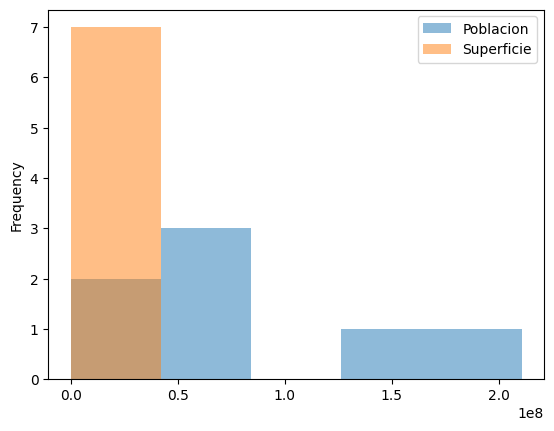

In [247]:
import matplotlib.pyplot as plt
%matplotlib inline

df[['Poblacion', 'Superficie']].plot.hist(bins=5, alpha=0.5)
plt.show()


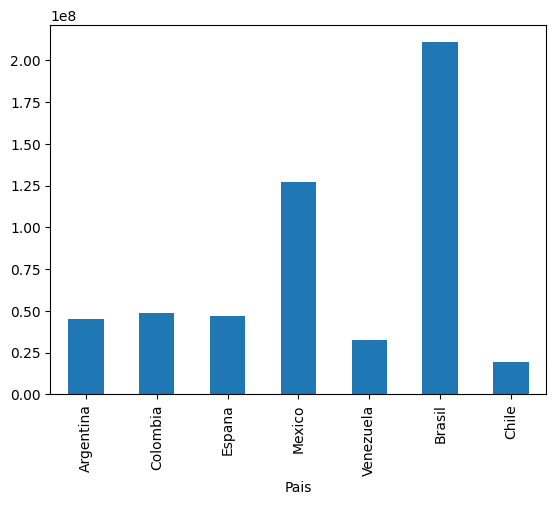

In [248]:
df.set_index('Pais')['Poblacion'].plot(kind='bar')
plt.show()


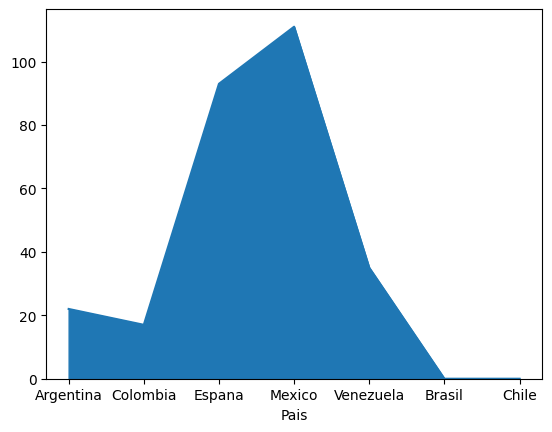

In [249]:
df.set_index('Pais')['Habit_x_km2'].plot(kind='area')
plt.show()


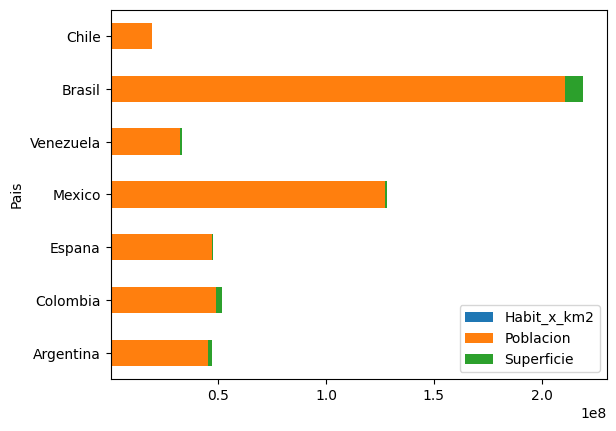

In [250]:
df.set_index('Pais').plot.barh(stacked=True)
plt.show()


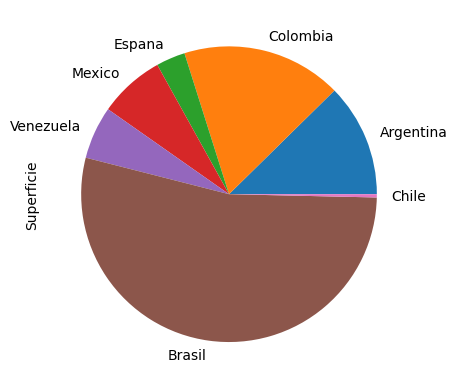

In [251]:
df.set_index('Pais')['Superficie'].plot.pie()
plt.show()


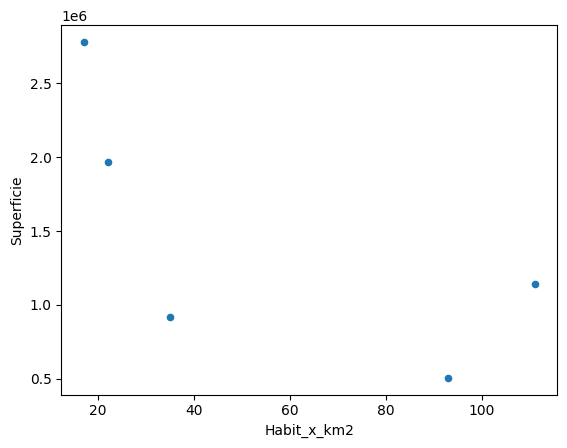

In [252]:
df.plot.scatter(x='Habit_x_km2', y='Superficie')
plt.show()


# Básicos!

In [253]:
# Leer un archivo csv
#df_csv = pd.read_csv("nombre_archivo.csv")

In [254]:
# Informacion de columnas, tipos de datos y nulos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Categoria    5 non-null      object 
 1   Codigo       5 non-null      object 
 2   Habit_x_km2  5 non-null      float64
 3   Pais         7 non-null      object 
 4   Poblacion    7 non-null      int64  
 5   Superficie   7 non-null      int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 468.0+ bytes


In [255]:
# estadísticas sobre las columnas numéricas
df.describe()


,Habit_x_km2,Poblacion,Superficie
count,5.00000,7.000000e+00,7.000000e+00
mean,55.60000,7.582171e+07,2.268826e+06
std,43.33359,6.880286e+07,2.900563e+06
min,17.00000,1.924100e+07,5.610200e+04
25%,22.00000,3.879500e+07,7.111945e+05
50%,35.00000,4.709900e+07,1.142748e+06
75%,93.00000,8.806700e+07,2.372388e+06
max,111.00000,2.106880e+08,8.515770e+06


In [ ]:
#ver primeras n filas  (ó ultimas)
df.head(2)
df.tail(2)


,Categoria,Codigo,Habit_x_km2,Pais,Poblacion,Superficie
5,NaN,NaN,NaN,Brasil,210688000,8515770
6,NaN,NaN,NaN,Chile,19241000,56102


In [257]:
# dimensiones del dataframe (filas, columnas)
df.shape


(7, 6)

In [258]:
#cantidad de filas
len(df)


7

In [259]:
#Iterar un dataframe
for index, row in df.iterrows():    
    print(row['Pais'])


Argentina
Colombia
Espana
Mexico
Venezuela
Brasil
Chile


In [260]:
# Obtener sumatoria, media y cantidad de una columna
print(df['Habit_x_km2'].mean())
print(df['Habit_x_km2'].sum())
print(df['Habit_x_km2'].count())
print(df['Habit_x_km2'].min())
print(df['Habit_x_km2'].max())


55.6
278.0
5
17.0
111.0


In [261]:
# Revisar si tenemos nulos en la tabla
df.isnull().sum()


Categoria      2
Codigo         2
Habit_x_km2    2
Pais           0
Poblacion      0
Superficie     0
dtype: int64

In [262]:
#acceso a una columna
df.Superficie


0    1964375
1    2780400
2     505944
3    1142748
4     916445
5    8515770
6      56102
Name: Superficie, dtype: int64

In [263]:
# unicos
df.Categoria.unique()


array(['C', 'A', 'B', nan], dtype=object)

In [264]:
# cantidad de unicos
len(df.Categoria.unique())


4

In [265]:
# contabilizar por una columna
# pd.value_counts(df['Categoria'], sort = True) # deprecado
df['Categoria'].value_counts(sort=True)


Categoria
C    2
B    2
A    1
Name: count, dtype: int64

In [266]:
# Obtener ultima fila
df.iloc[-1]


Categoria           NaN
Codigo              NaN
Habit_x_km2         NaN
Pais              Chile
Poblacion      19241000
Superficie        56102
Name: 6, dtype: object

In [267]:
# obtener primera columna
df.iloc[:,0]


0      C
1      A
2      B
3      B
4      C
5    NaN
6    NaN
Name: Categoria, dtype: object

In [268]:
# Busco por indice
df.loc[2]


Categoria             B
Codigo             ESPA
Habit_x_km2        93.0
Pais             Espana
Poblacion      47099000
Superficie       505944
Name: 2, dtype: object

In [269]:
df.columns


Index(['Categoria', 'Codigo', 'Habit_x_km2', 'Pais', 'Poblacion',
       'Superficie'],
      dtype='object')

In [270]:
# obtner una columna dentro de una condicion
df.loc[(df['Superficie'] < 1000000), ["Pais"]]


,Pais
2,Espana
4,Venezuela
6,Chile


In [271]:
# Modificar Valor con loc
df.loc[(df['Superficie'] < 1000000), "Categoria"] = 'D'
df


,Categoria,Codigo,Habit_x_km2,Pais,Poblacion,Superficie
0,C,ARGE,22.0,Argentina,45167000,1964375
1,A,COLO,17.0,Colombia,48922000,2780400
2,D,ESPA,93.0,Espana,47099000,505944
3,B,MEXI,111.0,Mexico,127212000,1142748
4,D,VENE,35.0,Venezuela,32423000,916445
5,NaN,NaN,NaN,Brasil,210688000,8515770
6,D,NaN,NaN,Chile,19241000,56102
